# 4章　ニューラルネットワークの学習

## 4.1 "データ駆動"ならびに"訓練データとテストデータ"
訓練データセットを元にテストデータセットの画像はどのようにラベリングすればよいか、正答率があがるのかという研究が行われてきた。<br>
例えば手書き数字の認識があげられるだろう。<br>
黎明期、人が手書き文字の癖を加味しながらその文字が""何""であることのルールを探していた。<br>
頭からひねり出す代わりに機械に学習させる動きが出てきた。<br>
画像から"特徴量"を抽出して、パターンを機械に学習させた。<br>
この時点では"特徴量"は人の考えたものであった。<br>
今では特徴量の設定から学習まで機械に投げるニューラルネットワークがあるわけだ。<br>
この手法でも簡単にうまくいくわけではなく、過学習のような問題が累積している。<br>

## 4.2 損失関数
過学習が起きる話は個人的に何度か触れているのでわかっているとは思うが、<br>
任意の答えを出力する関数を求める為に多くの観点から学習させて精度を上げたいところだが、目的のものよりも必要以上に複雑になってしまうこと。<br>
(本来はsin関数で済むところが10次関数くらいになっててオイオイといった感じの。)<br>
![](ow.jpg")


### 4.2.1 2乗和誤差
損失関数として有名なのは２乗誤差である。以下に数式を示す。くコ:彡<br>
$$E= \frac {1} {2
} \sum _k (y_k - t_k)^2$$
上式のykはNNの出力でありソレに対応した確率、tkは教師データであり答えを指す。<br>
MNISTのデータセットでうんにゃらした時を思い出しながら例を示す。<br>
yとtは10個の要素からなるデータであり、2であることを判定したい。<br>
2乗和誤差を定義してぐだぐだ言わずに突っ込んでみる。<br>

In [ ]:
>>> y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
>>> t=[0,0,1,0,0,0,0,0,0,0]
>>> def mean_squared_error(y,t):
...     return 0.5  * np.sum((y-t)**2)
>>> mean_squared_error(np.array(y),np.array(t))
0.097500000000000031
>>> y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.5,0.0]
>>> mean_squared_error(np.array(y),np.array(t))
0.72250000000000003

と、このように<br>
yの要素の中で2を1番高い確率にした場合と、7を1番高い確率にした場合でエラー率が大きく違うことがわかるだろう。<br>
よって1つ目の例のほうが教師データに適合している<br>

### 4.2.2 交差エントロピー誤差
以下に数式を示す。くコ:彡
$$E=- \sum _k t_k log y_k $$
yとtは4.2.1と同じなので省略<br>
コレの良い点は正解ラベルとなる出力の結果を上式に突っ込むだけで誤差が分かるということにあることであろう。<br>
グラフより逆算がしやすく、感覚的にわかりやすいね。やったね。<br>
同じように示す。<br>

In [ ]:
>>> def cross_entropy_error(y,t):
...     delta = 1e-7
...     return -np.sum(t * np.log(y+delta))
>>> cross_entropy_error(np.array(y),np.array(t))
0.51082545709933802
>>> cross_entropy_error(np.array(y),np.array(t))
2.3025840929945458

(ここまでは此の中でプログラムを走らせることを忘れていたことを許して欲しい。)

### 4.2.3 ミニバッチ学習
これまでは１つのデータに対しての損失関数の話をしてきましたここからは全てのデータに対して行う。<br>
N個のデータ用に拡張しただけなので式は省略する。<br>
MNISTはご存知の通り６万ものデータがあり、その全てから学習するのはコストがかかる。ここで訓練データからデータの一部を取り出して近似的に学習をする。これをミニバッチ学習と言う。<br>

In [4]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
(x_train,t_train), (x_test, t_test) = \
    load_mnist( normalize = True, one_hot_label=True)
    
print(x_train.shape) 
print(t_train.shape)

(60000, 784)
(60000, 10)


６万の28*28のデータとワンホットラベルを作れたのがわかった。<br>次にバッチ学習の為に適当に取り出す画像を選ぶ。

In [7]:
np.random.choice(60000,10)

array([27207, 24440, 37582, 58044, 49885, 25599, 47588,  9344, 22097, 43232])

バッチ対応版の交差エントロピーの実装を以下に記述する。<br>

In [8]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.reshape[0]
    return -np.sum(t * np.log(y)) / batch_size
#    return -np.sum(np.log(y[np.arrange(batch_size),t])) / batch_size ワンホットラベルでなく数字ラベルの場合

## 4.3 数値微分
### 4.3.1 微分
軽く微分の復習を。数値微分の定義と言えば以下である。くコ:彡
    $$ \frac {df(x)}{dx} = lim_{h \rightarrow 0} \frac {f(x+h)+f(x)} {h} $$
pythonでは丸め誤差があることを念頭に置いて、微小な値hは10の-4乗程度を使うと良い結果が得られることがわかっている。<br>
また、xとx+hから求めた接線であるので、実は真の接線ではない。<br>ここで(x+h)と(x-h)での関数fの差分を調べることで解消することにする。


In [15]:
def numerical_diff(f,x):
    h= 1e-4
    return (f(x+h) - f(x-h))/(2*h)

### 4.3.2 数値微分の例
以下のような簡単な関数を微分して精度を確かめてみる。くコ:彡
$$ y=0.01x^2 + 0.1x $$
Pythonで実装したものが以下である。くコ:彡

In [13]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [19]:
import numpy as np
x=np.arange(0.0, 20.0, 0.1)
y=function_1(x)

numerical_diff(function_1,5)

0.1999999999990898

In [20]:
numerical_diff(function_1,10)

0.2999999999986347

10の-13乗レベルで誤差が小さい！すごい！

### 4.3.3 偏微分
続いて以下のような数式について見ていく。<br>
$$ f(x_{0} , x_{1}) =x_{0}^2 +x_{1}^2 $$
Pythonでは以下の様に書ける。くコ:彡

In [21]:
def function_2(x):
    return x[0]**2+x[1]**2

以下からはx0=3,x1=4のときのそれぞれの微分について求める。くコ:彡

In [24]:
def function_tmp0(x0): #x0に対する偏微分を求める 
    return x0*x0+4.0**2.0

numerical_diff(function_tmp0,3.0)

6.00000000000378

In [25]:
def function_tmp1(x1): #x1に対する偏微分を求める 
    return 3.0**2.0+x1*x1

numerical_diff(function_tmp0,4.0)

7.999999999999119

このように複数の変数があっても傾きは求められるよということだ。

## 4.4 勾配
先程は2変数についてそれぞれ計算をした。<br>ここからはまとめて計算したいご要望にお答えする。

In [29]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx]=tmp_val+h
        fxh1=f(x)

        x[idx]=tmp_val-h
        fxh2=f(x)

        grad[idx] = (fxh1- fxh2)/(2*h)
        x[idx] = tmp_val
    return grad


In [30]:
numerical_gradient(function_2, np.array([3.0,4.0]))

array([ 6.,  8.])

やったあぁ！さっきの(6.00000000000378,7.999999999999119)とちっかいゾ。

In [31]:
numerical_gradient(function_2, np.array([-3.0,-4.0]))

array([-6., -8.])

勾配がマイナスのこともある。<br>これですり鉢状のfunction_2の最小値を探ることが出来るのがわかるだろう。


### 4.4.1 勾配法
先程まで勾配が…とか傾きがマイナスが…と少しずつ述べてきたがここから手法として本格的に考えていく。以下に勾配法の数式を表す。くコ:彡
$$ x_{0}=x_{0} - \eta \frac{\partial f}{\partial x_{0}}  $$
ηは更新の量を表し、学習率と呼ばれる。<br>1回の学習でどれだけ学習とパラメータの更新をするかをきめる重要なファクターである。

fは最適化したい関数、init_xは初期値、lrは学習率、step_numを勾配法の繰り返し回数とする。<br>関数の傾きを求めて以下にPythonで実装したものを示す。くコ:彡

In [32]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x

初期位置を(-3.0,4.0)として勾配法を用いて探索をして見る。<br>
引数を見てくれればどんな感じかは察せると思う。<br>以下に成功例、学習率が大きすぎる場合、小さすぎる場合についてそれぞれ例を出す。くコ:彡 

In [40]:
init_x=np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

In [38]:
init_x=np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=10, step_num=100)

array([ -2.58983747e+13,  -1.29524862e+12])

In [39]:
init_x=np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

### 4.4.2 NNに対する勾配
ここで2×3の形状の重みWだけ持つNNがある。<br>損失関数をLで表す場合を考える。
<br>行列で表すとWと損失関数の変化を表す行列は以下のように表せる。くコ:彡
$$
  W = \left(
    \begin{array}{ccc}
      W_{11} & W_{21} & W_{31} \\
      W_{12} & W_{22} & W_{32} \\
    \end{array}
  \right)
$$
$$
  \frac{\delta L}{\delta W} = \left(
    \begin{array}{ccc}
      \frac{\delta L}{\delta w_{11}} & \frac{\delta L}{\delta w_{21}} & \frac{\delta L}{\delta w_{31}} \\
      \frac{\delta L}{\delta w_{12}} & \frac{\delta L}{\delta w_{22}} & \frac{\delta L}{\delta w_{32}} \\
    \end{array}
  \right)
$$

In [2]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.rand(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [29]:
net =simpleNet()
print(net.W)

[[ 0.44936032  0.26360891  0.17456213]
 [ 0.37696559  0.97913008  0.20215002]]


In [30]:
x=np.array([0.6,0.9])
p=net.predict(x)
print(p)

[ 0.60888522  1.03938242  0.2866723 ]


In [31]:
np.argmax(p)

1

In [35]:
t=np.array([1,0,0])
net.loss(x,t)

1.1825139802000499

In [36]:
t=np.array([0,1,0])
net.loss(x,t)

0.75201678553279705

In [37]:
t=np.array([0,0,1])
net.loss(x,t)

1.5047269085428816

In [26]:
def f(W):
    return net.loss(x,t)
dW = numerical_gradient(f,net.W)
print(dW)

[[ 0.2225752   0.2094516  -0.43202679]
 [ 0.33386279  0.3141774  -0.64804019]]


numerical_gradient(f,net.W)の結果はdwとなり、形状が2×3の二次元配列となる。<br>
dWの中身を見ると1行1列目の値hogeから、Wの値をhだけ増やすと、損失関数の値がh*hogeの分だけ増加することを意味する。<br>
また、マイナスの項目を見ると、損失関数が減少する。<br>
損失関数を減少させる観点おいてマイナスの項目の方が大きく貢献しているのだ。

## 4.5 学習アルゴリズムの実行
ここまで駆け足でしたが、損失関数、ミニバッチ、勾配、勾配降下法について勉強してきました。<br>これらを用いてNNの学習手順をまとめて行きます。
#### 前提
ニューラルネットワークは、適応可能な重みとバイアスがありこの２つを訓練データに適応するように調整することを学習と呼ぶ。
#### ステップ１ ミニバッチ
訓練データの中からランダムに一部のデータを選び出す。その選ばれたデータをミニバッチと言う。ここではそのミニバッチの損失関数の値を減らすことを目的とする。
#### ステップ２ 勾配の算出
ミニバッチの損失関数を減らす為に、各重みのパラメータの勾配を求める。勾配は、損失関数の値を最も減らす方向を示す。
#### ステップ３ パラメータの更新
重みパラメータを勾配方向に微小だが更新する
#### ステップ４ 繰り返す
<br><br>

この手法は確率的勾配降下法と呼ばれている。

In [38]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.790833333333, 0.793
train acc, test acc | 0.878166666667, 0.8827
train acc, test acc | 0.899766666667, 0.9036
train acc, test acc | 0.908733333333, 0.9108
train acc, test acc | 0.9154, 0.9161
train acc, test acc | 0.91985, 0.9207
train acc, test acc | 0.923233333333, 0.9255
train acc, test acc | 0.926783333333, 0.9293
train acc, test acc | 0.930583333333, 0.9322
train acc, test acc | 0.9327, 0.9342
train acc, test acc | 0.936266666667, 0.9363
train acc, test acc | 0.9392, 0.9395
train acc, test acc | 0.940666666667, 0.94
train acc, test acc | 0.94245, 0.9405
train acc, test acc | 0.944633333333, 0.9427
train acc, test acc | 0.94661666

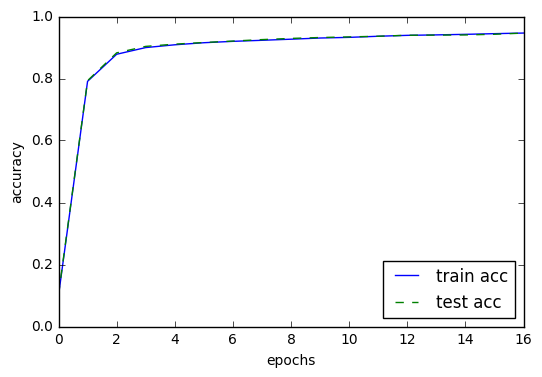

In [41]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()